In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [231]:
homeless=pd.read_csv('homeless_charter_2014.csv')
homeless.head()

,BEDS,Name,Borough,NumHomeless
0,320700860957,ACADEMIC LEADERSHIP CHARTER SCHOOL,BRONX,32
1,343000860998,ACADEMY OF THE CITY CHARTER SCHOOL,QUEENS,17
2,331900860933,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,KINGS,16
3,331900860993,ACHIEVEMENT FIRST ASPIRE CHARTER SCHOOL,KINGS,12
4,331900861072,ACHIEVEMENT FIRST BROOKLYN ACADEMY CHARTER SCHOOL,KINGS,16


In [250]:
scores=pd.read_csv('scores_combined_2014.csv')
scores.tail()

,DBN,School Name,Category,M_NumTested,M_meanscore,M_L1,M_L2,M_L3,M_L4,ELA_NumTested,ELA_meanscore,ELA_L1,ELA_L2,ELA_L3,ELA_L4
1246,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,PS,313,284.9201,143,133,33,4,311,277.8264,171,117,22,1
1247,32K383,J.H.S. 383 PHILIPPA SCHUYLER,PS,741,307.5668,132,378,168,63,868,313.6555,72,395,300,101
1248,32K384,P.S. /I.S. 384 FRANCES E. CARTER,PS,378,289.0608,165,133,61,19,397,293.7431,142,162,75,18
1249,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,PS,118,329.5169,2,31,53,32,183,322.1530,13,59,73,38
1250,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,PS,231,269.3723,162,65,4,0,224,271.4688,145,71,8,0


In [233]:
income=pd.read_csv('income_zip_2014.csv')
income.head()

,zip,total,sub10k,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-60,60-75,75-100,100-125,125-150,150-200,above200
0,6390,132,0,1,1,0,0,0,0,1,0,3,7,0,15,22,54,28
1,10001,11169,894,463,664,314,355,239,336,417,440,505,554,1253,856,513,1076,2290
2,10002,32550,5110,3651,2698,2418,1488,1503,1216,1008,1003,2047,2444,2250,1533,1456,952,1773
3,10003,27564,1765,587,1014,854,760,578,448,811,606,1368,2116,3183,2507,1849,3320,5798
4,10004,1580,33,20,39,23,0,73,20,40,11,71,29,206,239,111,163,502


In [234]:
zipcode=pd.read_csv('school_beds_zipcode.csv')
zipcode.head()

,ATS_code,Location Name,BEDS Number,Managed By Name,Zip
0,NaN,Amani Charter School,6.609009e+11,Charter,10522
1,NaN,"Victory Schools, DBA The Charter School of Exc...",NaN,Charter,10701
2,NaN,The Academy Charter School,NaN,Charter,11550
3,NaN,EverGreen Charter School,NaN,Charter,11561
4,01M015,P.S. 015 Roberto Clemente,3.101000e+11,DOE,10009


In [235]:
homeless_zip=pd.merge(homeless, zipcode, left_on='BEDS', right_on='BEDS Number', how='left')
homeless_zip.head()

,BEDS,Name,Borough,NumHomeless,ATS_code,Location Name,BEDS Number,Managed By Name,Zip
0,320700860957,ACADEMIC LEADERSHIP CHARTER SCHOOL,BRONX,32,84X491,Academic Leadership Charter School,3.207009e+11,Charter,10454
1,343000860998,ACADEMY OF THE CITY CHARTER SCHOOL,QUEENS,17,84Q359,Academy of the City Charter School,3.430009e+11,Charter,11377
2,331900860933,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,KINGS,16,84K774,Achievement First Apollo Charter School,3.319009e+11,Charter,11208
3,331900860993,ACHIEVEMENT FIRST ASPIRE CHARTER SCHOOL,KINGS,12,84K680,Achievement First Aspire Charter School,3.319009e+11,Charter,11208
4,331900861072,ACHIEVEMENT FIRST BROOKLYN ACADEMY CHARTER SCHOOL,KINGS,16,84K788,Achievement First Linden Elementary School,3.319009e+11,Charter,11207


In [236]:
income['psub10'] = income['sub10k']/income['total']*100
income['p1015'] = income['10-15']/income['total']*100
income['p1520'] = income['15-20']/income['total']*100
income['p2025'] = income['20-25']/income['total']*100
income['p2530'] = income['25-30']/income['total']*100
income['ppov']=(income['psub10']+income['p1015']+income['p1520']+income['p2025']+income['p2530'])/income['total']*100
poverty = income[['zip', 'psub10','p1015','p1520','p2025','p2530','ppov']]
poverty.head()

,zip,psub10,p1015,p1520,p2025,p2530,ppov
0,6390,0.000000,0.757576,0.757576,0.000000,0.000000,1.147842
1,10001,8.004298,4.145402,5.945026,2.811353,3.178440,0.215637
2,10002,15.698925,11.216590,8.288786,7.428571,4.571429,0.145021
3,10003,6.403280,2.129589,3.678711,3.098244,2.757220,0.065546
4,10004,2.088608,1.265823,2.468354,1.455696,0.000000,0.460663


In [237]:
charter_poverty=pd.merge(homeless_zip, poverty, left_on='Zip', right_on='zip', how='left')
charter_poverty=charter_poverty.drop(['Zip','BEDS Number'],1)
charter_poverty.head()

,BEDS,Name,Borough,NumHomeless,ATS_code,Location Name,Managed By Name,zip,psub10,p1015,p1520,p2025,p2530,ppov
0,320700860957,ACADEMIC LEADERSHIP CHARTER SCHOOL,BRONX,32,84X491,Academic Leadership Charter School,Charter,10454,24.873828,14.491709,11.647841,9.004246,5.695746,0.526423
1,343000860998,ACADEMY OF THE CITY CHARTER SCHOOL,QUEENS,17,84Q359,Academy of the City Charter School,Charter,11377,6.297461,4.874019,5.865345,4.864487,5.693769,0.087679
2,331900860933,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,KINGS,16,84K774,Achievement First Apollo Charter School,Charter,11208,20.603032,6.299104,7.677464,5.051688,5.292901,0.154804
3,331900860993,ACHIEVEMENT FIRST ASPIRE CHARTER SCHOOL,KINGS,12,84K680,Achievement First Aspire Charter School,Charter,11208,20.603032,6.299104,7.677464,5.051688,5.292901,0.154804
4,331900861072,ACHIEVEMENT FIRST BROOKLYN ACADEMY CHARTER SCHOOL,KINGS,16,84K788,Achievement First Linden Elementary School,Charter,11207,19.555738,8.550303,5.700202,6.597573,5.782356,0.145937


In [239]:
scores['lowELApct'] = scores['ELA_L1']/scores['ELA_NumTested']*100
scores['lowMathpct'] = scores['M_L1']/scores['M_NumTested']*100
scores = scores[['lowELApct','lowMathpct','ELA_meanscore','M_meanscore','School Name','ELA_NumTested','M_NumTested','DBN']]
scores.head()

,lowELApct,lowMathpct,ELA_meanscore,M_meanscore,School Name,ELA_NumTested,M_NumTested,DBN
0,36.666667,12.500000,295.5583,314.9750,EXPLORE EXCEED CHARTER SCHOOL,120,120,84K333
1,17.405063,6.031746,305.6171,327.7683,WILLIAMSBURG COLLEGIATE CHARTER SCHOOL,316,315,84K355
2,23.279352,15.618661,301.0425,312.7140,ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL,494,493,84K356
3,36.811594,31.884058,290.8290,298.7594,KIPP AMP CHARTER SCHOOL,345,345,84K357
4,16.309013,11.182796,307.2146,318.9247,ACHIEVEMENT FIRST EAST NEW YORK CHARTER SCHOOL,466,465,84K358


In [241]:
charter_all=pd.merge(charter_poverty, scores, left_on='Name', right_on='School Name', how='left')
charter_all=charter_all.drop('Location Name',1)
charter_all['phomeless_M']=charter_all['NumHomeless']/charter_all['M_NumTested']*100
charter_all['phomeless_ELA']=charter_all['NumHomeless']/charter_all['ELA_NumTested']*100
charter_all.head(30)

,BEDS,Name,Borough,NumHomeless,ATS_code,Managed By Name,zip,psub10,p1015,p1520,...,lowELApct,lowMathpct,ELA_meanscore,M_meanscore,School Name,ELA_NumTested,M_NumTested,DBN,phomeless_M,phomeless_ELA
0,320700860957,ACADEMIC LEADERSHIP CHARTER SCHOOL,BRONX,32,84X491,Charter,10454,24.873828,14.491709,11.647841,...,24.025974,13.071895,306.2792,318.0196,ACADEMIC LEADERSHIP CHARTER SCHOOL,154,153,84X491,20.915033,20.779221
1,343000860998,ACADEMY OF THE CITY CHARTER SCHOOL,QUEENS,17,84Q359,Charter,11377,6.297461,4.874019,5.865345,...,48.214286,46.428571,285.5714,289.8750,ACADEMY OF THE CITY CHARTER SCHOOL,56,56,84Q359,30.357143,30.357143
2,331900860933,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,KINGS,16,84K774,Charter,11208,20.603032,6.299104,7.677464,...,24.615385,12.213740,303.3385,306.0229,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,130,131,84K774,12.213740,12.307692
3,331900860993,ACHIEVEMENT FIRST ASPIRE CHARTER SCHOOL,KINGS,12,84K680,Charter,11208,20.603032,6.299104,7.677464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,331900861072,ACHIEVEMENT FIRST BROOKLYN ACADEMY CHARTER SCHOOL,KINGS,16,84K788,Charter,11207,19.555738,8.550303,5.700202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,332300860912,ACHIEVEMENT FIRST BROWNSVILLE CHARTER SCHOOL,KINGS,27,84K626,Charter,11233,17.117219,9.783432,7.557171,...,18.153846,12.883436,307.6554,314.3589,ACHIEVEMENT FIRST BROWNSVILLE CHARTER SCHOOL,325,326,84K626,8.282209,8.307692
6,333200860906,ACHIEVEMENT FIRST BUSHWICK CHARTER SCHOOL,KINGS,27,84K538,Charter,11237,12.713541,5.556555,6.839297,...,17.702448,7.735849,307.3898,326.5075,ACHIEVEMENT FIRST BUSHWICK CHARTER SCHOOL,531,530,84K538,5.094340,5.084746
7,331700860879,ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL,KINGS,35,84K356,Charter,11203,11.036666,5.573553,5.238551,...,23.279352,15.618661,301.0425,312.7140,ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL,494,493,84K356,7.099391,7.085020
8,331900860880,ACHIEVEMENT FIRST EAST NEW YORK CHARTER SCHOOL,KINGS,28,84K358,Charter,11207,19.555738,8.550303,5.700202,...,16.309013,11.182796,307.2146,318.9247,ACHIEVEMENT FIRST EAST NEW YORK CHARTER SCHOOL,466,465,84K358,6.021505,6.008584
9,331300860902,ACHIEVEMENT FIRST ENDEAVOR CHARTER SCHOOL,KINGS,54,84K508,Charter,11238,6.834329,4.389138,4.955760,...,20.754717,10.823529,304.1910,318.0918,ACHIEVEMENT FIRST ENDEAVOR CHARTER SCHOOL,424,425,84K508,12.705882,12.735849


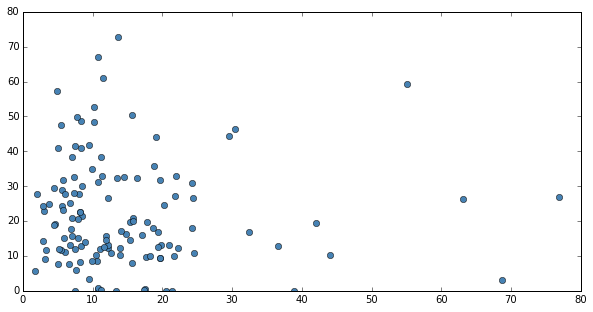

In [242]:
fig = pl.figure(7,figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(charter_all['phomeless_M'], charter_all['lowMathpct'], 'o', color='SteelBlue')

In [243]:
import statsmodels.formula.api as sm
model = sm.ols(formula='lowMathpct ~ phomeless_M', data=charter_all) 
fit = model.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             lowMathpct   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.07288
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.788
Time:                        04:27:49   Log-Likelihood:                -526.62
No. Observations:                 127   AIC:                             1057.
Df Residuals:                     125   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      22.3216      2.124     10.511      

In [244]:
model2 = sm.ols(formula='lowELApct ~ phomeless_ELA', data=charter_all) 
fit = model2.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              lowELApct   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.796
Date:                Wed, 16 Dec 2015   Prob (F-statistic):             0.0536
Time:                        04:27:58   Log-Likelihood:                -512.90
No. Observations:                 127   AIC:                             1030.
Df Residuals:                     125   BIC:                             1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        26.2931      1.896     13.869

In [245]:
model3 = sm.ols(formula='lowMathpct ~ psub10', data=charter_all) 
fit = model3.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             lowMathpct   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5242
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.470
Time:                        04:28:05   Log-Likelihood:                -522.92
No. Observations:                 126   AIC:                             1050.
Df Residuals:                     124   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.3188      4.247      4.313      0.0

In [246]:
model4 = sm.ols(formula='lowMathpct ~ ppov', data=charter_all) 
fit = model4.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             lowMathpct   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                  0.009857
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.921
Time:                        04:30:32   Log-Likelihood:                -523.18
No. Observations:                 126   AIC:                             1050.
Df Residuals:                     124   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     21.0676      2.119      9.944      0.0

In [255]:
school_all=pd.merge(scores, zipcode, left_on='DBN', right_on='ATS_code', how='left')
school_all=pd.merge(school_all,poverty,left_on='Zip',right_on='zip',how='left')


In [256]:
school_all['lowELApct'] = school_all['ELA_L1']/school_all['ELA_NumTested']*100
school_all['lowMathpct'] = school_all['M_L1']/school_all['M_NumTested']*100
school_all = school_all.dropna()
school_all.tail()

,DBN,School Name,Category,M_NumTested,M_meanscore,M_L1,M_L2,M_L3,M_L4,ELA_NumTested,...,Zip,zip,psub10,p1015,p1520,p2025,p2530,ppov,lowELApct,lowMathpct
1246,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,PS,313,284.9201,143,133,33,4,311,...,11221,11221,16.097104,6.852122,7.053553,5.883170,6.282559,0.146449,54.983923,45.686901
1247,32K383,J.H.S. 383 PHILIPPA SCHUYLER,PS,741,307.5668,132,378,168,63,868,...,11237,11237,12.713541,5.556555,6.839297,6.371756,4.729365,0.217050,8.294931,17.813765
1248,32K384,P.S. /I.S. 384 FRANCES E. CARTER,PS,378,289.0608,165,133,61,19,397,...,11207,11207,19.555738,8.550303,5.700202,6.597573,5.782356,0.145937,35.768262,43.650794
1249,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,PS,118,329.5169,2,31,53,32,183,...,11237,11237,12.713541,5.556555,6.839297,6.371756,4.729365,0.217050,7.103825,1.694915
1250,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,PS,231,269.3723,162,65,4,0,224,...,11207,11207,19.555738,8.550303,5.700202,6.597573,5.782356,0.145937,64.732143,70.129870


In [260]:
model4 = sm.ols(formula='lowELApct ~ ppov + Category', data=school_all) 
fit = model4.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              lowELApct   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     35.81
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           7.59e-16
Time:                        04:36:46   Log-Likelihood:                -5260.3
No. Observations:                1238   AIC:                         1.053e+04
Df Residuals:                    1235   BIC:                         1.054e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         22.6922      1.696     13.

In [261]:
model5 = sm.ols(formula='lowMathpct ~ psub10 + Category', data=ps) 
fit = model5.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             lowMathpct   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     244.6
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           3.23e-90
Time:                        04:37:05   Log-Likelihood:                -5263.1
No. Observations:                1238   AIC:                         1.053e+04
Df Residuals:                    1235   BIC:                         1.055e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -4.0807      1.933     -2.

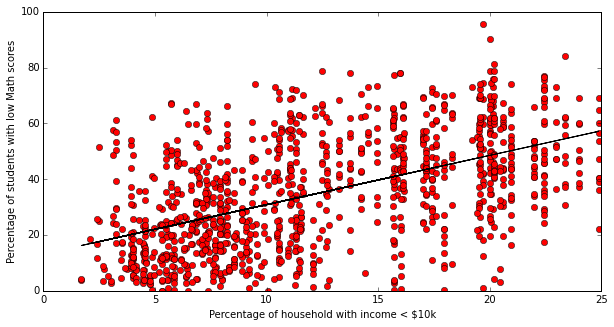

In [230]:
fig = pl.figure(7,figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(ps['psub10'],ps['lowMathpct'], 'o', color='red')
ax.plot(ps.psub10,fit.predict(),'k')
pl.ylabel('Percentage of students with low Math scores')
pl.xlabel('Percentage of household with income < $10k')